In [61]:
import os
import pandas as pd
from mtqe.data.loaders import load_ced_test_data
from mtqe.utils.paths import EVAL_DIR, PREDICTIONS_DIR
from mtqe.utils.plots import create_confusion_matrix_plot
from mtqe.utils.language_pairs import LI_LANGUAGE_PAIRS_WMT_21_CED
import matplotlib.pyplot as plt

In [37]:
EXPERIMENT_GROUP_NAME = 'train_monolingual_auth_data'
DATA_SPLIT = 'test'
THRESHOLD_STRATEGY = 'default'
FILE_SUFFIX = 'max_results.csv'

In [47]:
eval_files = [os.path.join(EVAL_DIR, EXPERIMENT_GROUP_NAME, file) for file in os.listdir(os.path.join(EVAL_DIR, EXPERIMENT_GROUP_NAME)) if file.endswith(FILE_SUFFIX)]
enja_separate = False
if os.path.isdir(os.path.join(EVAL_DIR, EXPERIMENT_GROUP_NAME + '_enja')):
    eval_files.extend([os.path.join(EVAL_DIR, EXPERIMENT_GROUP_NAME + '_enja', file) for file in os.listdir(os.path.join(EVAL_DIR, EXPERIMENT_GROUP_NAME + '_enja')) if file.endswith(FILE_SUFFIX)])
    enja_separate = True
    

In [34]:
dfs = []
for file in eval_files:
    df = pd.read_csv(file)
    dfs.append(df)

df_meta_results = pd.concat(dfs)

In [39]:
df_meta_results = df_meta_results[(df_meta_results['threshold_strategy'] == THRESHOLD_STRATEGY) & (df_meta_results['split'] == DATA_SPLIT)]

In [59]:
# Get lists of data to create plot
preds = []
targets = []
for lp in LI_LANGUAGE_PAIRS_WMT_21_CED:
    seed = df_meta_results[df_meta_results['language_pair']=='en-cs'].iloc[0]['seed']
    threshold = df_meta_results[df_meta_results['language_pair']=='en-cs'].iloc[0]['threshold']
    file_prefix = lp + '_' + DATA_SPLIT + '_' + str(seed)
    if lp == 'en-ja' and enja_separate:
        folder = EXPERIMENT_GROUP_NAME + '_enja'
    else:
        folder = EXPERIMENT_GROUP_NAME
    for file in os.listdir(os.path.join(PREDICTIONS_DIR, 'ced_data', folder)):
        if file.startswith(file_prefix) and file.endswith('.csv'):
            # found predictions
            df_preds = pd.read_csv(os.path.join(PREDICTIONS_DIR, 'ced_data', folder, file))
            scores = df_preds['score'].to_numpy()
            scores = 1 - scores
            binary_scores = scores > threshold
            binary_scores = binary_scores.astype('int')
            preds.append(binary_scores)
    targets.append(load_ced_test_data(lp))

In [60]:
len(targets)

4

In [46]:
df_meta_results[df_meta_results['language_pair']=='en-cs'].iloc[0]['seed']

42

TypeError: '<' not supported between instances of 'str' and 'int'

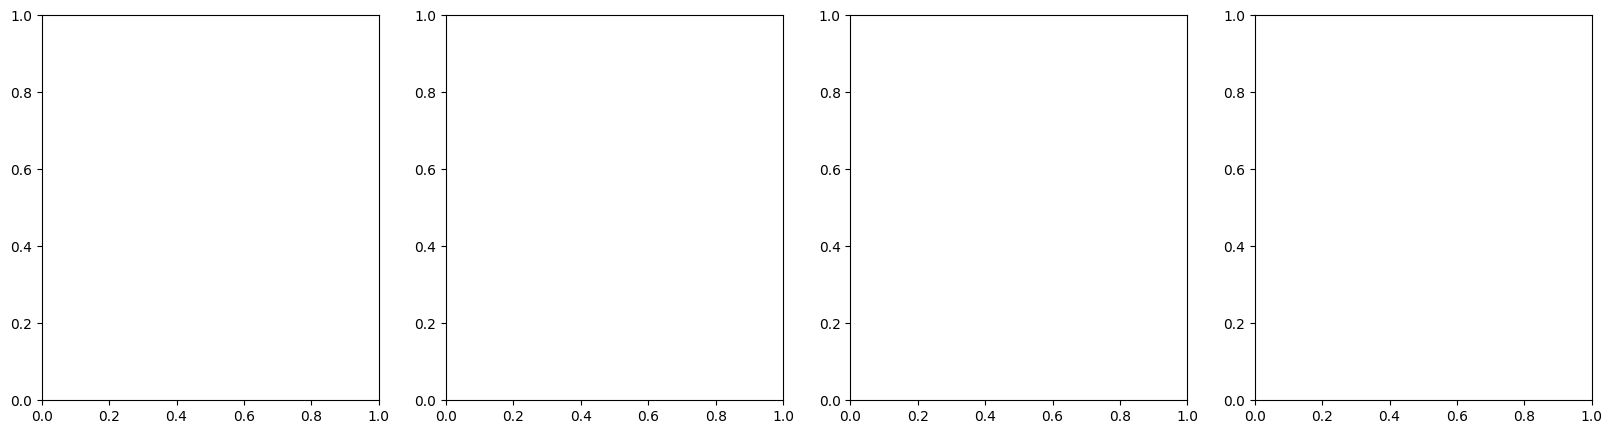

In [62]:
create_confusion_matrix_plot('temp', LI_LANGUAGE_PAIRS_WMT_21_CED, preds, targets)